(-0.5, 2101.5, 1343.5, -0.5)

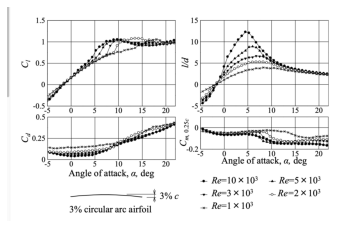

In [2]:
from tkinter import Tk, filedialog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# open the dialog box
# first hide the root window
root = Tk()
root.withdraw()

# open the dialog
filein = filedialog.askopenfilename(
    title = "Select image to digitize",
    filetypes = (
        ("jpeg files","*.jpg"),
        ("png files","*.png"))
    )
    
# read and show the image    
img = mpimg.imread(filein)
_, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')  # clear x-axis and y-axis

In [3]:
from tkinter import messagebox, simpledialog
def getReferenceLength(index):
    '''
    Get the reference length in the requested direction

    USAGE: factor = getReferenceLength(index)
    index = 0 for x-direction or 1 for y-direction
    '''

    # define a 'direction' string
    direction = 'x' if index == 0 else 'y'

    # get the reference length
    reply = False
    while not reply:
        messagebox.showinfo("Select reference length",
            "Use the mouse to select the reference length in {:s} direction.".format(direction) +
            "Click the start and the end of the reference length."
            )
        coord = plt.ginput(
            2,
            timeout=0,
            show_clicks=True
            ) # capture only two points
        # ask for a valid length
        validLength = False
        while not validLength:
            reflength = simpledialog.askfloat("Enter reference length",
                 "Enter the reference length in {:s} direction".format(direction))
            if isinstance(reflength, float):
                validLength = True
            else:
                messagebox.showerror("Error","Please provide a valid length.")
        
        # calculate scaling factor
        deltaref=coord[1][index]-coord[0][index]
        factor=reflength/deltaref

        reply = messagebox.askyesno("Length confirmation",
            "You selected {:4.0f} pixels in {:s} direction corresponding to {:4.4f} units. Is this correct?".format(deltaref, direction, reflength)
            )
    
    return factor

In [ ]:
from numpy import asarray

# get reference length in x direction
xfactor = getReferenceLength(0)

# get the reference length in y direction
yfactor = getReferenceLength(1)

messagebox.showinfo("Digitize curve",
            "Please digitize the curve. The first point is the origin." +
            "Left click: select point; Right click: undo; Middle click: finish"
            )

# get the curve points
x = plt.ginput(
    -1,
    timeout=0,
    show_clicks=True
    )
x = asarray(x)
      
ax.plot(x[:,0],x[:,1],'g','linewidth',1.5)
plt.draw()

# convert the curve points from pixels to coordinates
x[:,0] = (x[:,0]-x[0,0]) * xfactor
x[:,1] = (x[:,1]-x[0,1]) * yfactor

/var/folders/t9/hc5s57h95tj3rsp4qvk61m8m0000gn/T/ipykernel_23783/67154373.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  coord = plt.ginput(
